
<h2><b> Sampling by Acceptance-Rejection Method </2></h3>


COSTUDIED WITH ASHWANI RAJAN

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
alpha = 2
beta = 1.5
gamma_mean = alpha/beta
exp_mean = gamma_mean # keeping the mean of exponential dist = mean of gamma dist

<div class="alert alert-block alert-info">
    
    
Mean of gamma distribution which is E[X] = alpha/beta             

Mean of Exponential distribution = 1/lambda

</div>

In [19]:
alpha = 2
beta = 1.5
gamma_mean = alpha/beta
exp_mean = gamma_mean # keeping the mean of exponential dist = mean of gamma dist

print('Mean of gamma distribution: ', gamma_mean)
print('Mean of exponential distribution: ', exp_mean)

Mean of gamma distribution:  1.3333333333333333
Mean of exponential distribution:  1.3333333333333333


<div class="alert alert-block alert-success">
    
    Optimization of C
    
    
</div>    
    
    
    C is optimised based on 10000 samples put in gamma and exponential eqn.
    Their division will give 10000 samples , max of which is C.


DEFINE PDF OF GAMMA AND AUXILLARY

In [20]:
#Auxilary Random Variable
def g(x, lmbda):
 return lmbda*np.exp(-lmbda*x)
def f(x, a ,b):
 return stats.gamma.pdf(x, a=a, scale=1/b)


In [21]:

x = np.linspace(0.1,100,10000)
print(len(x))
y1 = g(x, lmbda = 1/exp_mean)
y2 = f(x, a =alpha, b = beta)
C = max(y2/y1)
print('Optimal Constant c: ', C )

10000
Optimal Constant c:  1.471509586156581


<div class="alert alert-block alert-success">
    14000 ITERATIONS NEEDED TO ACCEPT  10000 REALIZATIONS
    
    
    
</div>

In [22]:
N = 0
i = 0
sim = []
while N<= 10000:
 i+=1
 U= np.random.uniform(low = 0, high = 1, size = 1)
 Aux = np.random.exponential(exp_mean, 1)
 if U < f(Aux, alpha, beta)/(C*g(Aux, exp_mean)):
     N+=1
 sim.append(Aux[0])

In [23]:
print('Answer: For 10000 realizations, we need {} realizations from auxilary random variables'.format(i) )

Answer: For 10000 realizations, we need 14133 realizations from auxilary random variables


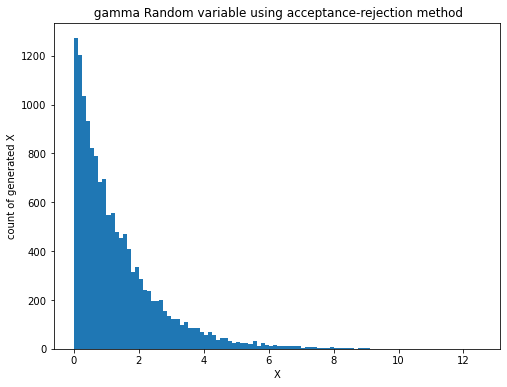

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(sim, bins = 100)
ax.set_xlabel('X')
ax.set_ylabel('count of generated X')
ax.set_title(' gamma Random variable using acceptance-rejection method')
plt.show()